In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow 
import warnings
warnings.filterwarnings("ignore")

In [2]:
color_1 = sns.color_palette("Accent", 10)
color_2 = sns.color_palette("mako_r", 10)
color_3 = sns.color_palette("Spectral_r", 10)
color_4 = sns.color_palette()

In [3]:
data = pd.read_csv("D:\\customer\\Churn_Modelling.csv")
display(data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
#Check missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.shape

(10002, 14)

In [6]:

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [7]:
#Check columns
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
data.duplicated().sum()

2

In [9]:
##Missing Vallues

In [10]:
data.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
print(data['Geography'].mode()[0])
print(data['Age'].median())
print(data['HasCrCard'].median())
print(data['IsActiveMember'].median())

France
37.0
1.0
1.0


In [12]:
#Fill data
data['Geography'] = data['Geography'].fillna(data['Geography'].mode()[0])
data['Age'] = data['Age'].fillna(data['Age'].median())
data['HasCrCard'] = data['HasCrCard'].fillna(data['HasCrCard'].median())
data['IsActiveMember'] = data['IsActiveMember'].fillna(data['IsActiveMember'].median())

In [13]:
#Cehck again data
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10002 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10002 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10002 non-null  float64
 8   IsActiveMember   10002 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


In [15]:
display(data)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [16]:
data1 = data.describe()
display(data1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,650.555089,38.922119,5.012498,76491.112875,1.530194,0.705559,0.514997,100083.331145,0.203759
std,96.661615,10.486693,2.891973,62393.474144,0.581639,0.455814,0.499800,57508.117802,0.402812
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [17]:
data1 =data1.astype(int)
display(data1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002,10002,10002,10002,10002,10002,10002,10002,10002
mean,650,38,5,76491,1,0,0,100083,0
std,96,10,2,62393,0,0,0,57508,0
min,350,18,0,0,1,0,0,11,0
25%,584,32,3,0,1,0,0,50983,0
50%,652,37,5,97198,1,1,1,100185,0
75%,718,44,7,127647,2,1,1,149383,0
max,850,92,10,250898,4,1,1,199992,1


In [18]:
display(data)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


Male      5458
Female    4544
Name: Gender, dtype: int64


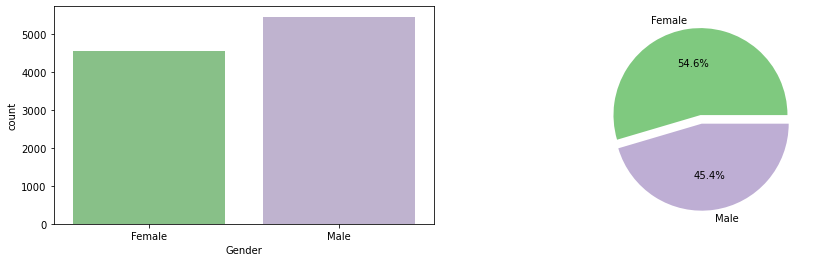

In [19]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.countplot('Gender', data = data, palette = color_1)

plt.subplot(1,2,2)
plt.pie(data['Gender'].value_counts(), explode = [0.0, 0.1], labels = ['Female', 'Male'],
       colors = color_1, autopct = '%.01f%%')
print(data['Gender'].value_counts())

0    7964
1    2038
Name: Exited, dtype: int64


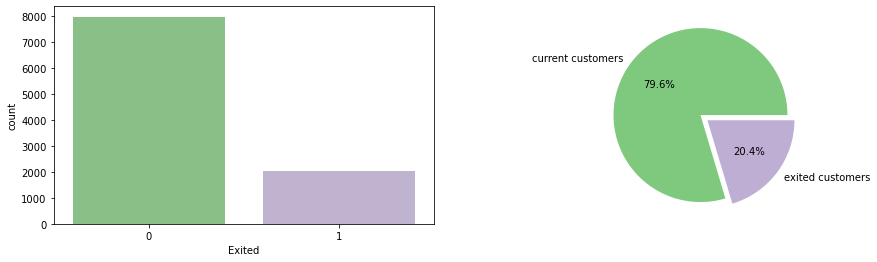

In [20]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.countplot('Exited', data = data, palette = color_1)

plt.subplot(1,2,2)
plt.pie(data['Exited'].value_counts(), explode = [0.0, 0.1], labels = ['current customers', 'exited customers'],
       colors = color_1, autopct = '%.01f%%')
print(data['Exited'].value_counts())

Exited  Geography
0       France       4205
        Spain        2064
        Germany      1695
1       Germany       815
        France        810
        Spain         413
Name: Geography, dtype: int64


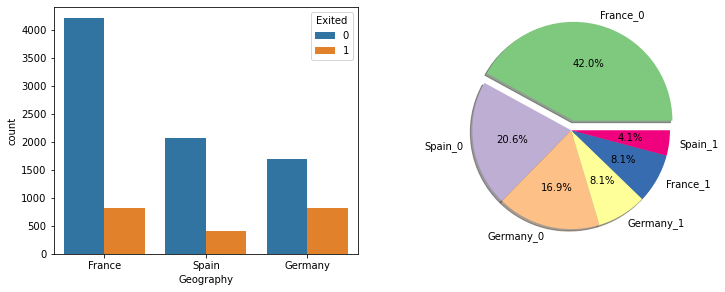

In [21]:
label = ["France_0","Spain_0","Germany_0","Germany_1","France_1","Spain_1"]
eplode = [0.1,0.0,0.0,0.0,0.0,0.0]
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.countplot('Geography', data = data, hue = 'Exited', palette = color_4)
plt.subplot(2,2,2)
plt.pie(data.Geography.groupby(data.Exited).value_counts(), explode = eplode, shadow = True, colors = color_1,
       labels = label, autopct = '%0.1f%%')
print(data.Geography.groupby(data.Exited).value_counts())

Exited  Geography
0       France       4205
        Spain        2064
        Germany      1695
1       Germany       815
        France        810
        Spain         413
Name: Geography, dtype: int64


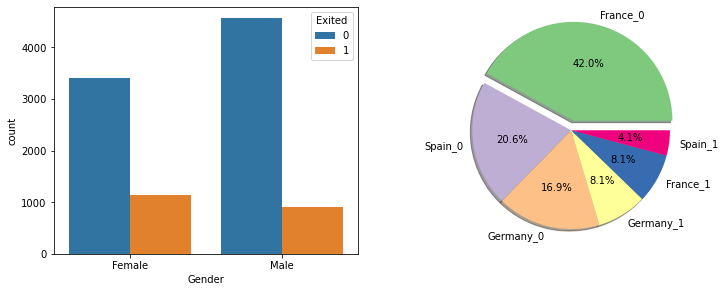

In [22]:

label = ["France_0","Spain_0","Germany_0","Germany_1","France_1","Spain_1"]
eplode = [0.1,0.0,0.0,0.0,0.0,0.0]
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.countplot('Gender', data = data, hue = 'Exited', palette = color_4)
plt.subplot(2,2,2)
plt.pie(data.Geography.groupby(data.Exited).value_counts(), explode = eplode, shadow = True, colors = color_1,
       labels = label, autopct = '%0.1f%%')
print(data.Geography.groupby(data.Exited).value_counts())

Exited  NumOfProducts
0       2                4242
        1                3676
        3                  46
1       1                1409
        2                 349
        3                 220
        4                  60
Name: NumOfProducts, dtype: int64
------------------------------
Exited  HasCrCard
0       1.0          5632
        0.0          2332
1       1.0          1425
        0.0           613
Name: HasCrCard, dtype: int64
------------------------------
Exited  IsActiveMember
0       1.0               4416
        0.0               3548
1       0.0               1303
        1.0                735
Name: IsActiveMember, dtype: int64


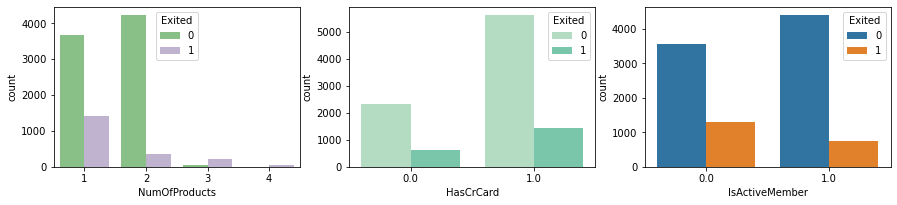

In [23]:
plt.figure(figsize = (15, 10))
plt.subplot(3,3,1)
sns.countplot(x = 'NumOfProducts', data = data, hue = 'Exited', palette = color_1)
plt.subplot(3,3,2)
sns.countplot(x = 'HasCrCard', data = data, hue = 'Exited', palette = color_2)
plt.subplot(3,3,3)
sns.countplot(x = 'IsActiveMember', data = data, hue = 'Exited', palette = color_4)

print(data.NumOfProducts.groupby(data.Exited).value_counts())
print('--'*15)
print(data.HasCrCard.groupby(data.Exited).value_counts())
print('--'*15)
print(data.IsActiveMember.groupby(data.Exited).value_counts())


Exited  CreditScore
0       850            190
        678             50
1       850             43
0       655             43
        684             43
                      ... 
1       404              1
        405              1
        407              1
        408              1
0       405              1
Length: 862, dtype: int64
------------------------------
Exited  Age 
0       37.0    417
        35.0    417
        38.0    414
        34.0    414
        36.0    402
               ... 
        84.0      1
        85.0      1
        88.0      1
1       19.0      1
        84.0      1
Length: 131, dtype: int64


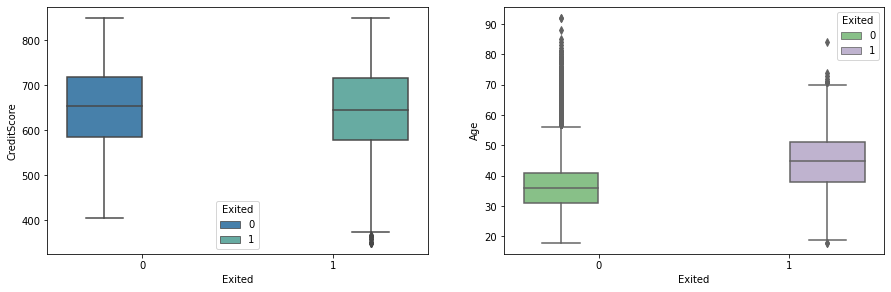

In [24]:
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
sns.boxplot(y = data['CreditScore'], x = data['Exited'], hue = data['Exited'], palette = color_3)
plt.subplot(2,2,2)
sns.boxplot(y = data['Age'], x = data['Exited'], hue = data['Exited'], palette = color_1)

print(data[['Exited', 'CreditScore']].value_counts())
print('--'*15)
print(data[['Exited','Age']].value_counts())

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

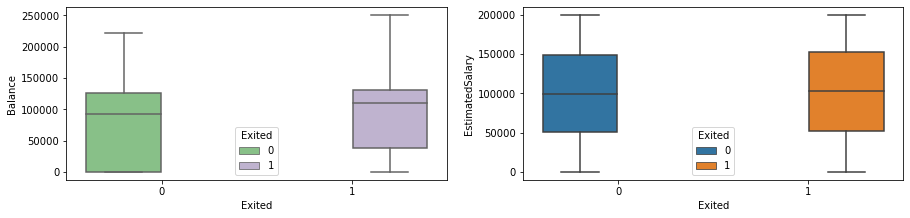

In [25]:
plt.figure(figsize = (15, 7))
plt.subplot(2,2,1)
sns.boxplot(y = data['Balance'], x = data['Exited'], hue = data['Exited'], palette = color_1)
plt.subplot(2,2,2)
sns.boxplot(y = data['EstimatedSalary'], x = data['Exited'], hue = data['Exited'], palette = color_4)

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         787
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         214
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64


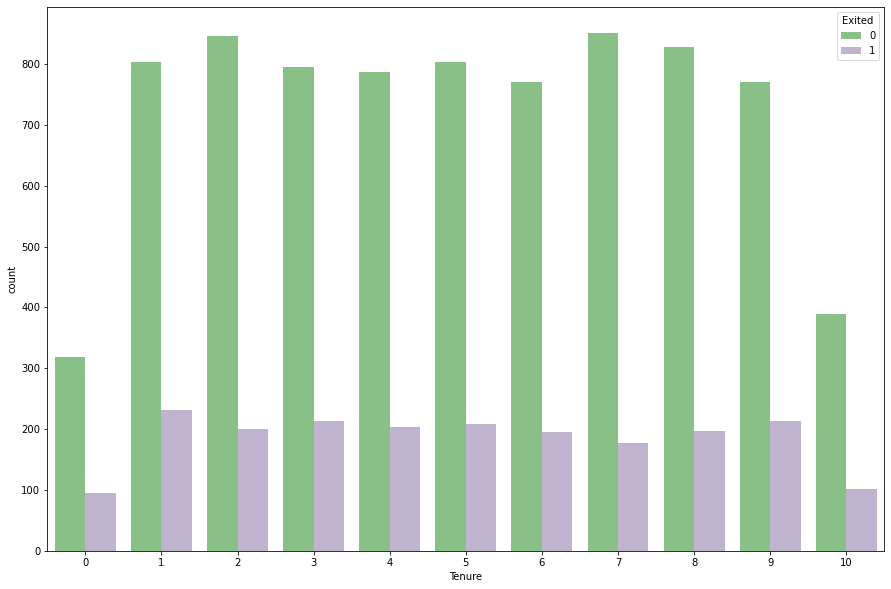

In [26]:
plt.figure(figsize = (15, 10))
sns.countplot(data = data, x = data['Tenure'], hue = data['Exited'],palette = color_1)
print(data.Tenure.groupby(data.Exited).value_counts())

In [27]:
data_new = data.copy()

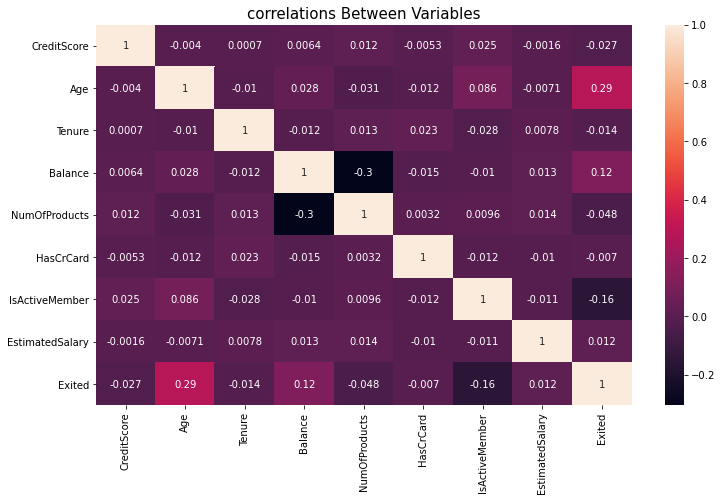

In [28]:
plt.figure(figsize = (12, 7))
sns.heatmap(data_new.corr(), annot = True)
plt.title("correlations Between Variables", size = 15)
plt.show()

In [29]:
data_new['Geography'].value_counts()

France     5015
Germany    2510
Spain      2477
Name: Geography, dtype: int64

In [30]:
data_new['Gender'].value_counts()

Male      5458
Female    4544
Name: Gender, dtype: int64

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
a = ['Geography', 'Gender']
en_ = OrdinalEncoder()
data_new[a] = en_.fit_transform(data_new[a])

In [33]:
print(data_new['Geography'].value_counts())
print(data_new['Gender'].value_counts())

0.0    5015
1.0    2510
2.0    2477
Name: Geography, dtype: int64
1.0    5458
0.0    4544
Name: Gender, dtype: int64


In [34]:
display(data_new.head())
display(data_new.columns)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2.0,0.0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0.0,0.0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0.0,0.0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,2.0,0.0,43.0,2,125510.82,1,1.0,1.0,79084.10,0


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [35]:
b = ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler

mix_scaler = MinMaxScaler()
data_new[b] = mix_scaler.fit_transform(data_new[b])
data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,2.0,0.0,0.310811,0.1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,2,0.0,0.0,0.469120,0
4,1.000,2.0,0.0,0.337838,0.2,0.500246,1,1.0,1.0,0.395400,0


In [36]:
x_1 = data_new.iloc[:, :-1]
y_1 = data_new['Exited']
display(x_1) 
display(y_1) 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,1,1.0,1.0,0.506735
1,0.516,2.0,0.0,0.310811,0.1,0.334031,1,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,3,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,2,0.0,0.0,0.469120
4,1.000,2.0,0.0,0.337838,0.2,0.500246,1,1.0,1.0,0.395400
...,...,...,...,...,...,...,...,...,...,...
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,1,0.0,1.0,0.210390
9998,0.844,1.0,1.0,0.324324,0.3,0.299226,2,1.0,0.0,0.464429
9999,0.844,1.0,1.0,0.324324,0.3,0.299226,2,1.0,0.0,0.464429
10000,0.884,0.0,0.0,0.135135,0.4,0.518708,1,1.0,0.0,0.190914


0        1
1        0
2        1
3        0
4        0
        ..
9997     1
9998     1
9999     1
10000    0
10001    0
Name: Exited, Length: 10002, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.20, random_state = 43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8001, 10)
(2001, 10)
(8001,)
(2001,)


In [38]:
data2 = data_new.copy()
display(data2)
data3 = data2[['Geography','Gender','Age','Tenure']].drop_duplicates()
display(data3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,2.0,0.0,0.310811,0.1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,2,0.0,0.0,0.469120,0
4,1.000,2.0,0.0,0.337838,0.2,0.500246,1,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,1,0.0,1.0,0.210390,1
9998,0.844,1.0,1.0,0.324324,0.3,0.299226,2,1.0,0.0,0.464429,1
9999,0.844,1.0,1.0,0.324324,0.3,0.299226,2,1.0,0.0,0.464429,1
10000,0.884,0.0,0.0,0.135135,0.4,0.518708,1,1.0,0.0,0.190914,0


,Geography,Gender,Age,Tenure
0,0.0,0.0,0.324324,0.2
1,2.0,0.0,0.310811,0.1
2,0.0,0.0,0.324324,0.8
3,0.0,0.0,0.283784,0.1
4,2.0,0.0,0.337838,0.2
...,...,...,...,...
9907,0.0,0.0,0.135135,1.0
9909,0.0,1.0,0.540541,0.2
9917,1.0,1.0,0.472973,0.8
9936,0.0,1.0,0.797297,0.1


In [39]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(x_train,y_train)

rl_y_pred = lr.predict(x_test)
lr_y_predtrain = lr.predict(x_train)

print('Values Prediction of Test')
print(rl_y_pred[:100])
print('Values Prediction of Train')
print(lr_y_predtrain[:100])


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
print('Test Data')
print(confusion_matrix(y_test, rl_y_pred))
print(classification_report(y_test, rl_y_pred))

print('--'*15)
print("Train Data")
print(confusion_matrix(y_train, lr_y_predtrain))
print(classification_report(y_train, lr_y_predtrain))

Values Prediction of Test
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Values Prediction of Train
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Test Data
[[1564   33]
 [ 343   61]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1597
           1       0.65      0.15      0.24       404

    accuracy                           0.81      2001
   macro avg       0.73      0.57      0.57      2001
weighted avg       0.79      0.81      0.76      2001

------------------------------
Train Data
[[6197  170]
 [1353  281]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      63

In [40]:
lr_test_score = lr.score(x_test, y_test)
lr_train_score = lr.score(x_train, y_train)
print("Test Score: ", lr_test_score * 100,'%')
print("Train Score: ", lr_train_score * 100,'%')

Test Score:  81.20939530234882 %
Train Score:  80.96487939007623 %


In [41]:
rl_roc_auc_test = roc_auc_score(y_test, rl_y_pred)
rl_roc_train = roc_auc_score(y_train, lr_y_predtrain)
print("Test data roc: ", round(rl_roc_auc_test, 3))
print("Train data roc: ", round(rl_roc_train, 3))

Test data roc:  0.565
Train data roc:  0.573


In [42]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0)
RF.fit(x_train, y_train)
RF_y_pred = RF.predict(x_test)
print(confusion_matrix(y_test, RF_y_pred))
print(classification_report(y_test, RF_y_pred))

[[1596    1]
 [ 377   27]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1597
           1       0.96      0.07      0.13       404

    accuracy                           0.81      2001
   macro avg       0.89      0.53      0.51      2001
weighted avg       0.84      0.81      0.74      2001



In [43]:
rf_test_score = RF.score(x_test, y_test)
rf_train_score = RF.score(x_train, y_train)

print("Test Score: ", rf_test_score)
print("Train Score: ", rf_train_score)

Test Score:  0.8110944527736131
Train Score:  0.8108986376702912


In [44]:
#Build a Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [45]:
nn = Sequential()

In [46]:
nn.add(Dense(128,input_dim=x_train.shape[1],activation="relu"))
nn.add(Dropout(0.3)) # Dropout Layer 1

nn.add(Dense(64,activation="relu")) # Hidden Layer 2
nn.add(Dropout(0.3)) # Dropout Layer 2

nn.add(Dense(32,activation="relu")) # Hidden Layer 3
nn.add(Dropout(0.3)) # Dropout Layer 3
nn.add(Dense(1,activation="sigmoid"))

In [47]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [48]:
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [49]:
hist = nn.fit(x_train,y_train,validation_split=0.20,epochs=100)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.5163 - accuracy: 0.7902 - val_loss: 0.4741 - val_accuracy: 0.8001
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7942 - val_loss: 0.4540 - val_accuracy: 0.8001
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7970 - val_loss: 0.4291 - val_accuracy: 0.8064
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8078 - val_loss: 0.4110 - val_accuracy: 0.8295
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.8200 - val_loss: 0.3886 - val_accuracy: 0.8401
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8259 - val_loss: 0.3785 - val_accuracy: 0.8445
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8341 - val_loss: 0.3813 - val_accuracy: 0.8451

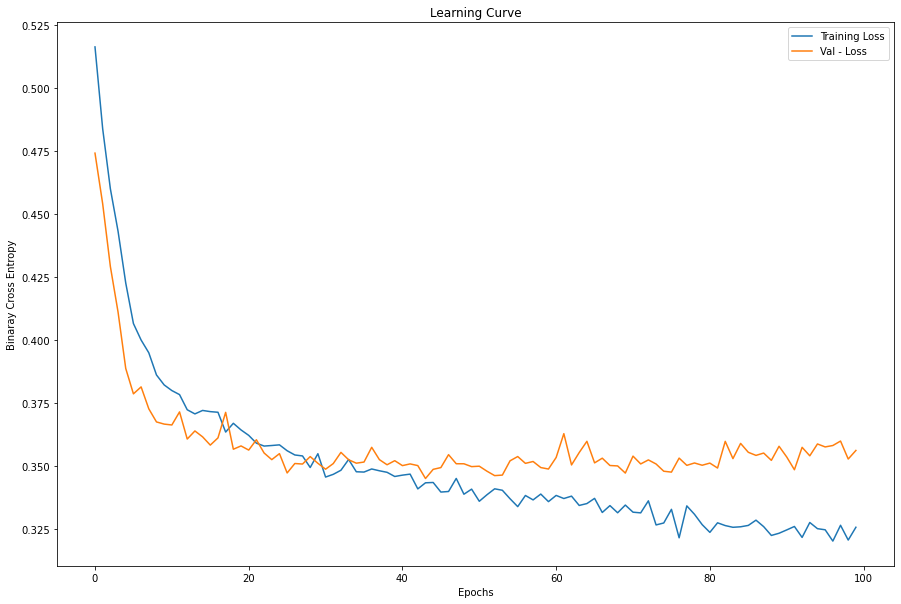

In [50]:
plt.figure(figsize = (15, 10))
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label = 'Val - Loss')
plt.xlabel('Epochs')
plt.ylabel('Binaray Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

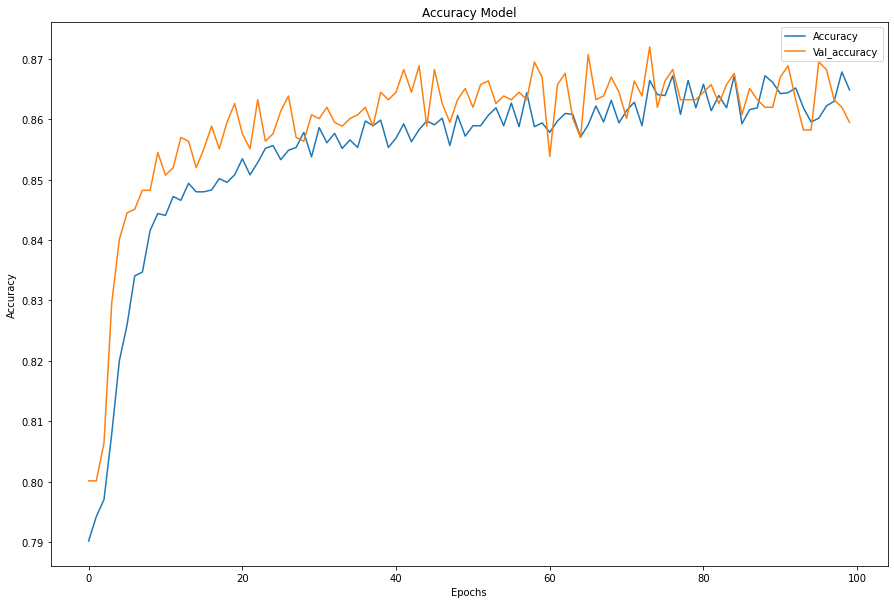

In [51]:
plt.figure(figsize = (15, 10))
plt.plot(hist.history['accuracy'], label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Model')
plt.legend()
plt.show()

In [52]:
nn.evaluate(x_train,y_train)

251/251 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8729


[0.30967187881469727, 0.8728908896446228]

In [53]:
nn.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8546


[0.3538896441459656, 0.8545727133750916]

In [54]:
train_pred = nn.predict(x_train)
test_pred = nn.predict(x_test)

63/63 [==============================] - 0s 796us/step


In [55]:
train_pred[:10]

array([[0.05791976],
       [0.7894233 ],
       [0.1871924 ],
       [0.06212663],
       [0.63303775],
       [0.01542972],
       [0.03284761],
       [0.2881327 ],
       [0.09398116],
       [0.10111021]], dtype=float32)

In [56]:
test_pred[:10]

array([[0.21187395],
       [0.02646429],
       [0.29060173],
       [0.44712818],
       [0.12017408],
       [0.22260094],
       [0.23667791],
       [0.21226262],
       [0.24717744],
       [0.30081043]], dtype=float32)

In [57]:
thresold = 0.5
train_pred_class = []
for i in train_pred:
    if i >= 0.5:
        train_pred_class.append(1)
    else:
        train_pred_class.append(0)
train_pred_class[:20]

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [58]:
thresold = 0.5
test_pred_class = []
for ii in test_pred:
    if ii >= 0.5:
        test_pred_class.append(1)
    else:
        test_pred_class.append(0)
test_pred_class[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [59]:
##End##
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
